In [2]:
%load_ext autoreload 
%autoreload 2
from IPython.display import Image

## Introduction to Transfer Learning (from a ML perspective)

Why transfer?

* Save training time (shared information across different tasks)
* Can train on data set A that's much larger than data set B - can enable training without overfitting
* Can freeze layers and reduce trainable parameters on task B
* Can perhaps interpret transferred weights

### Some results from "How transferable are features in deep neural networks" NIPS 2014 (Bengio et al.)

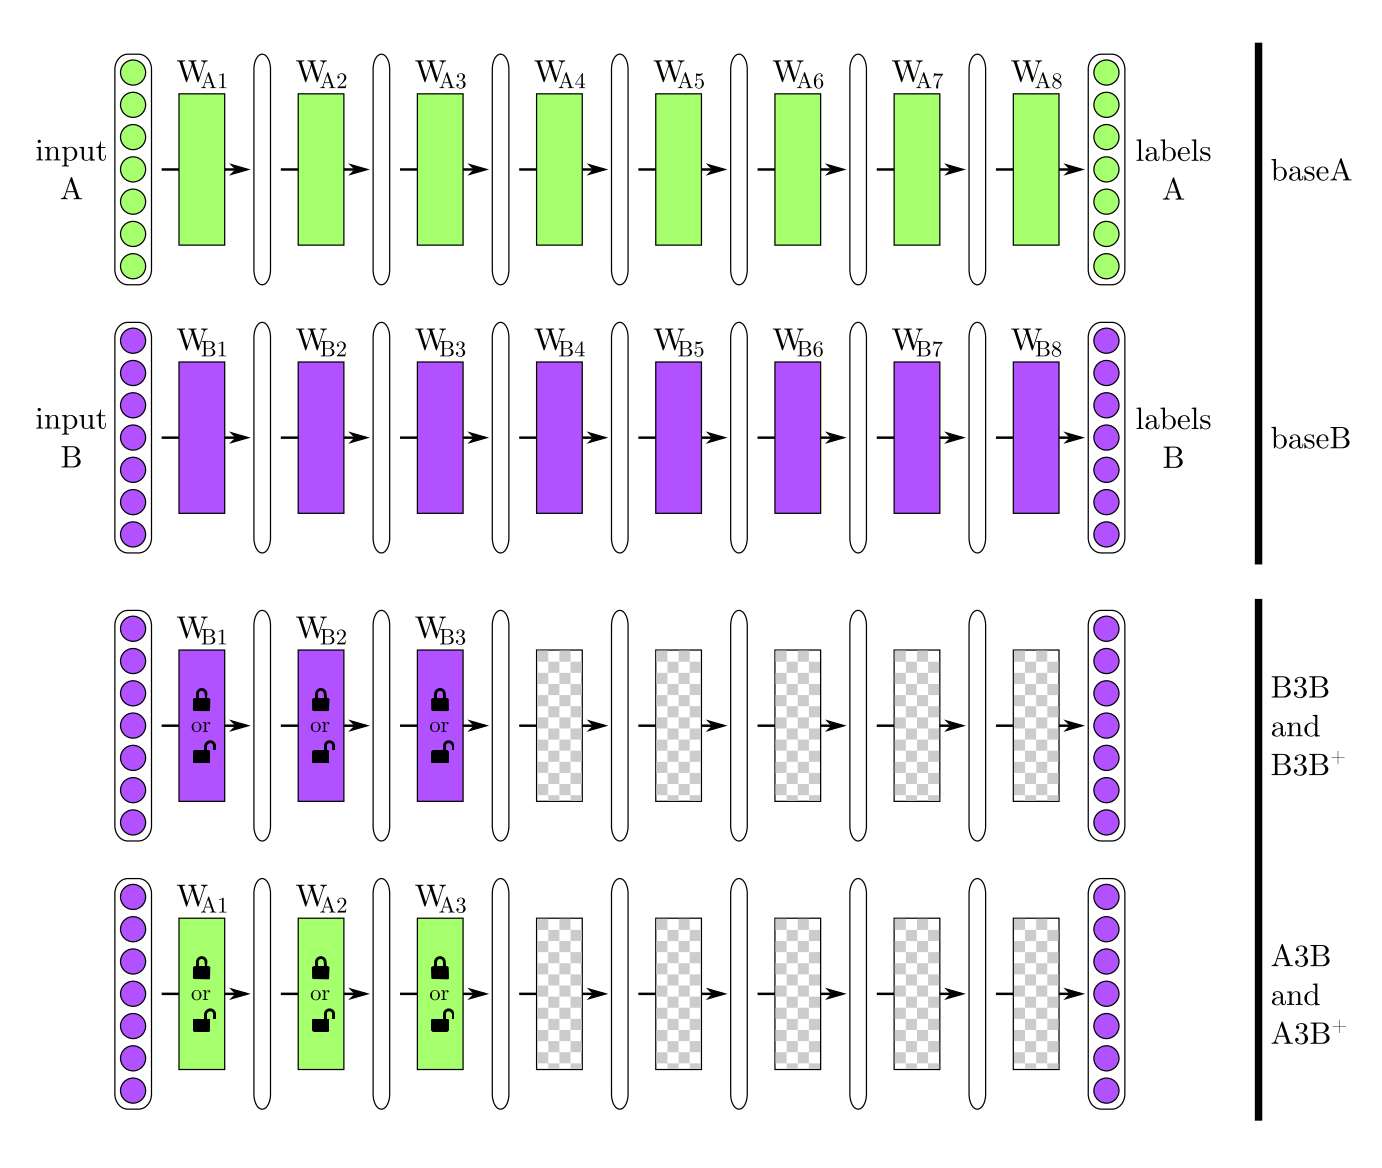

In [14]:
Image(filename='cap1.PNG') 

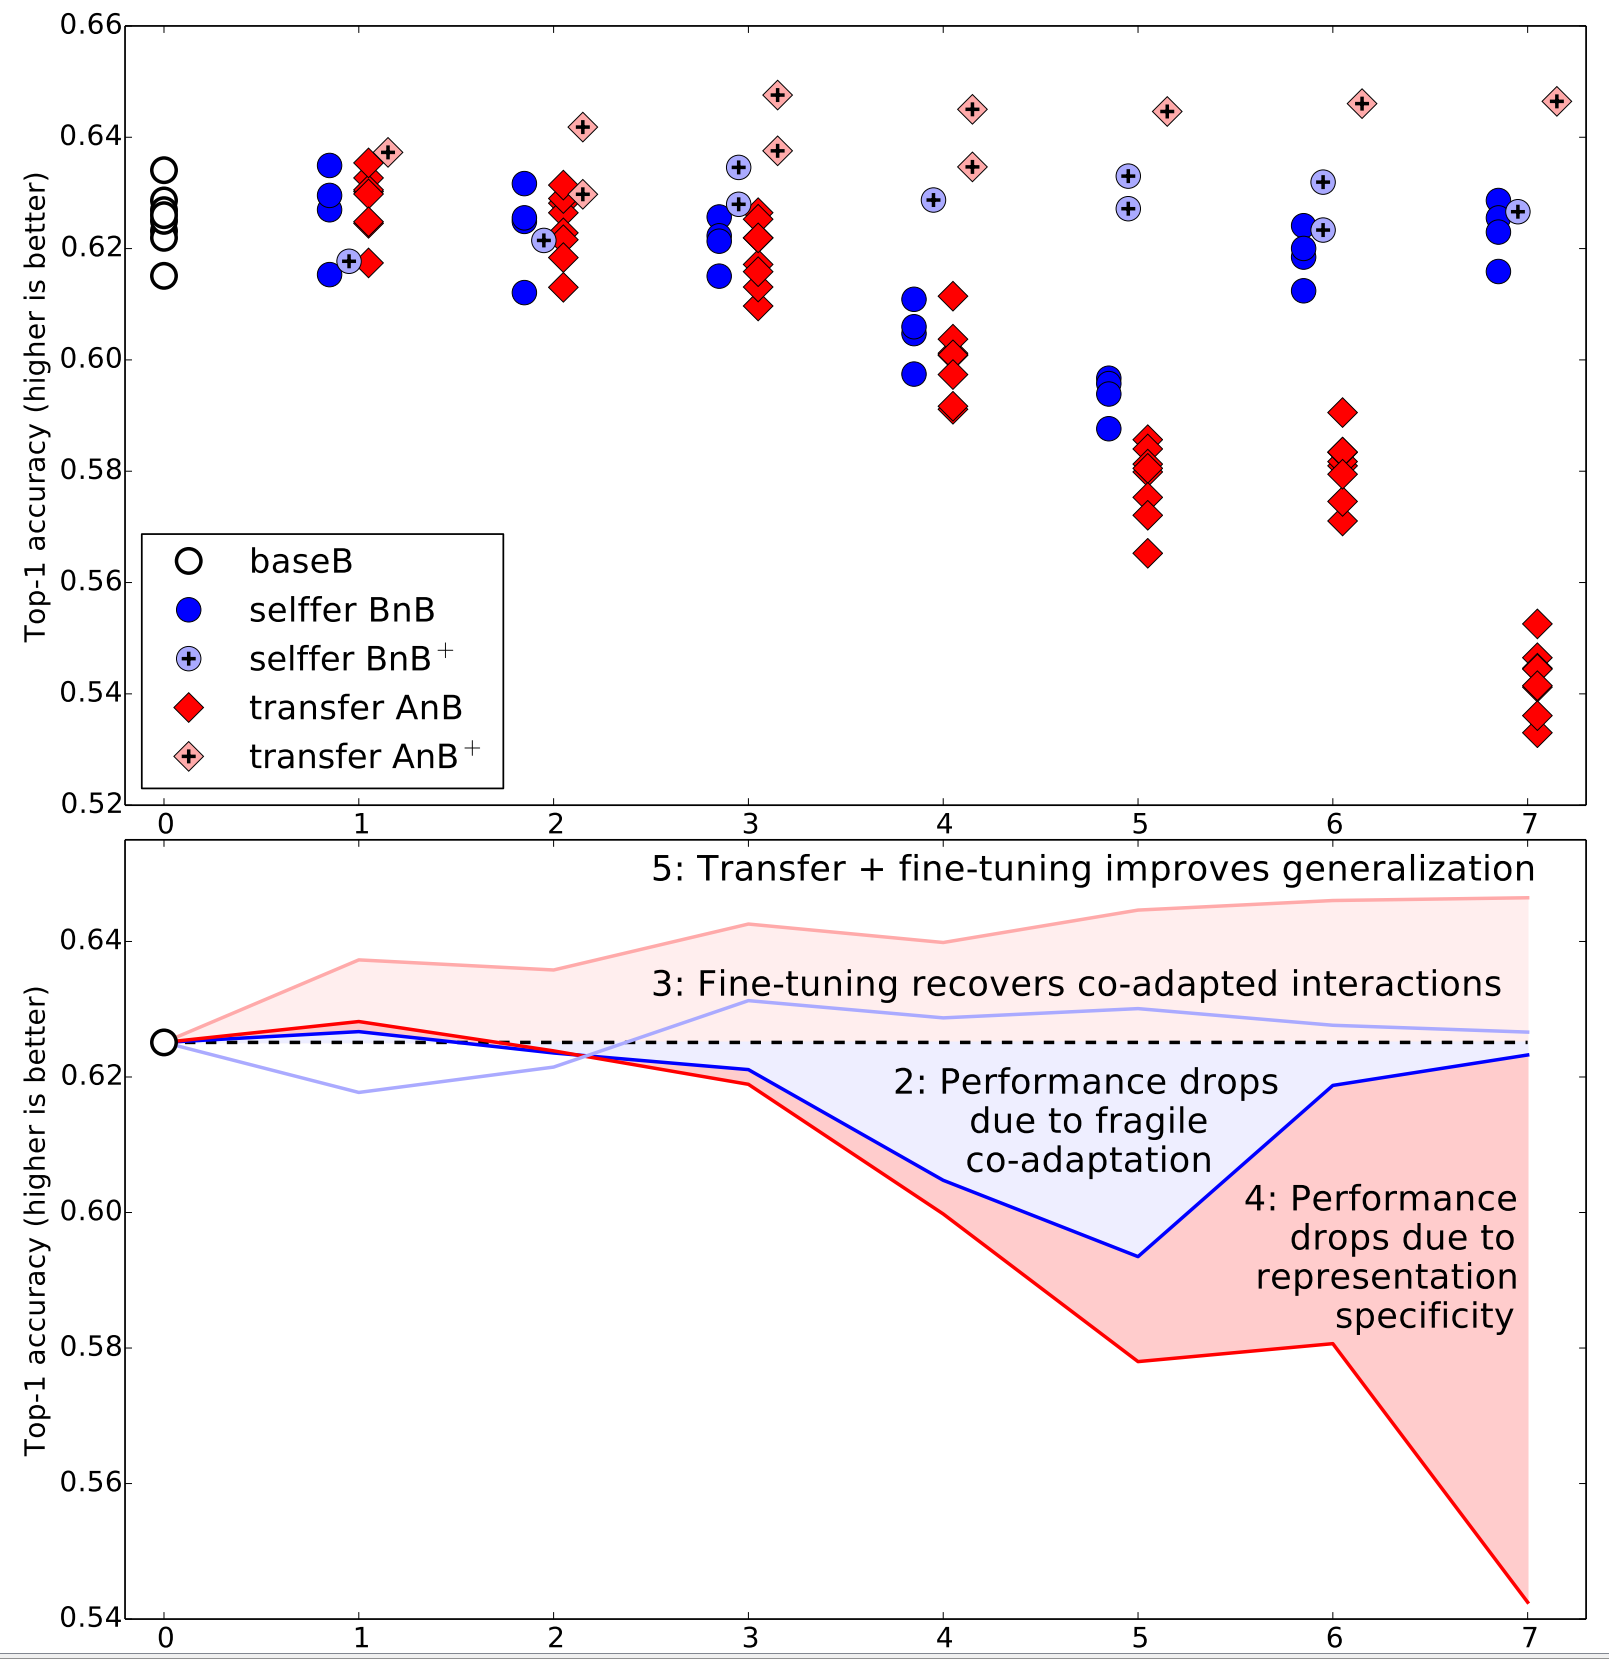

In [15]:
Image(filename='cap2.PNG') 

# Pathnet - "Evolutionary Dropout" + Transfer Learning

Intuition

Training on data set 1 (TASK 1)

* Initalize a set of convolutional/fc/custom modules ($N=14$), where each module is a set of nodes say $N=100$. 
* Randomly pick a path for a "winner" and a "challenger" through the modules (see illustration) 
* Train both "winner" and "challenger" on training data
* Compare metric between "winner" and "challenger" and assign a new "winner" based on the two 
* Generate new "challenger" genotype
* Mutate the "winner" genotype randomly

Transfer on training data set 2 (TASK 2)

* Fix the winning genotype (i.e., from Task 1)'s weights - they are no longer trainable
* Initalize new "challenger" genotype
* Repeat genetic algorithm competition process



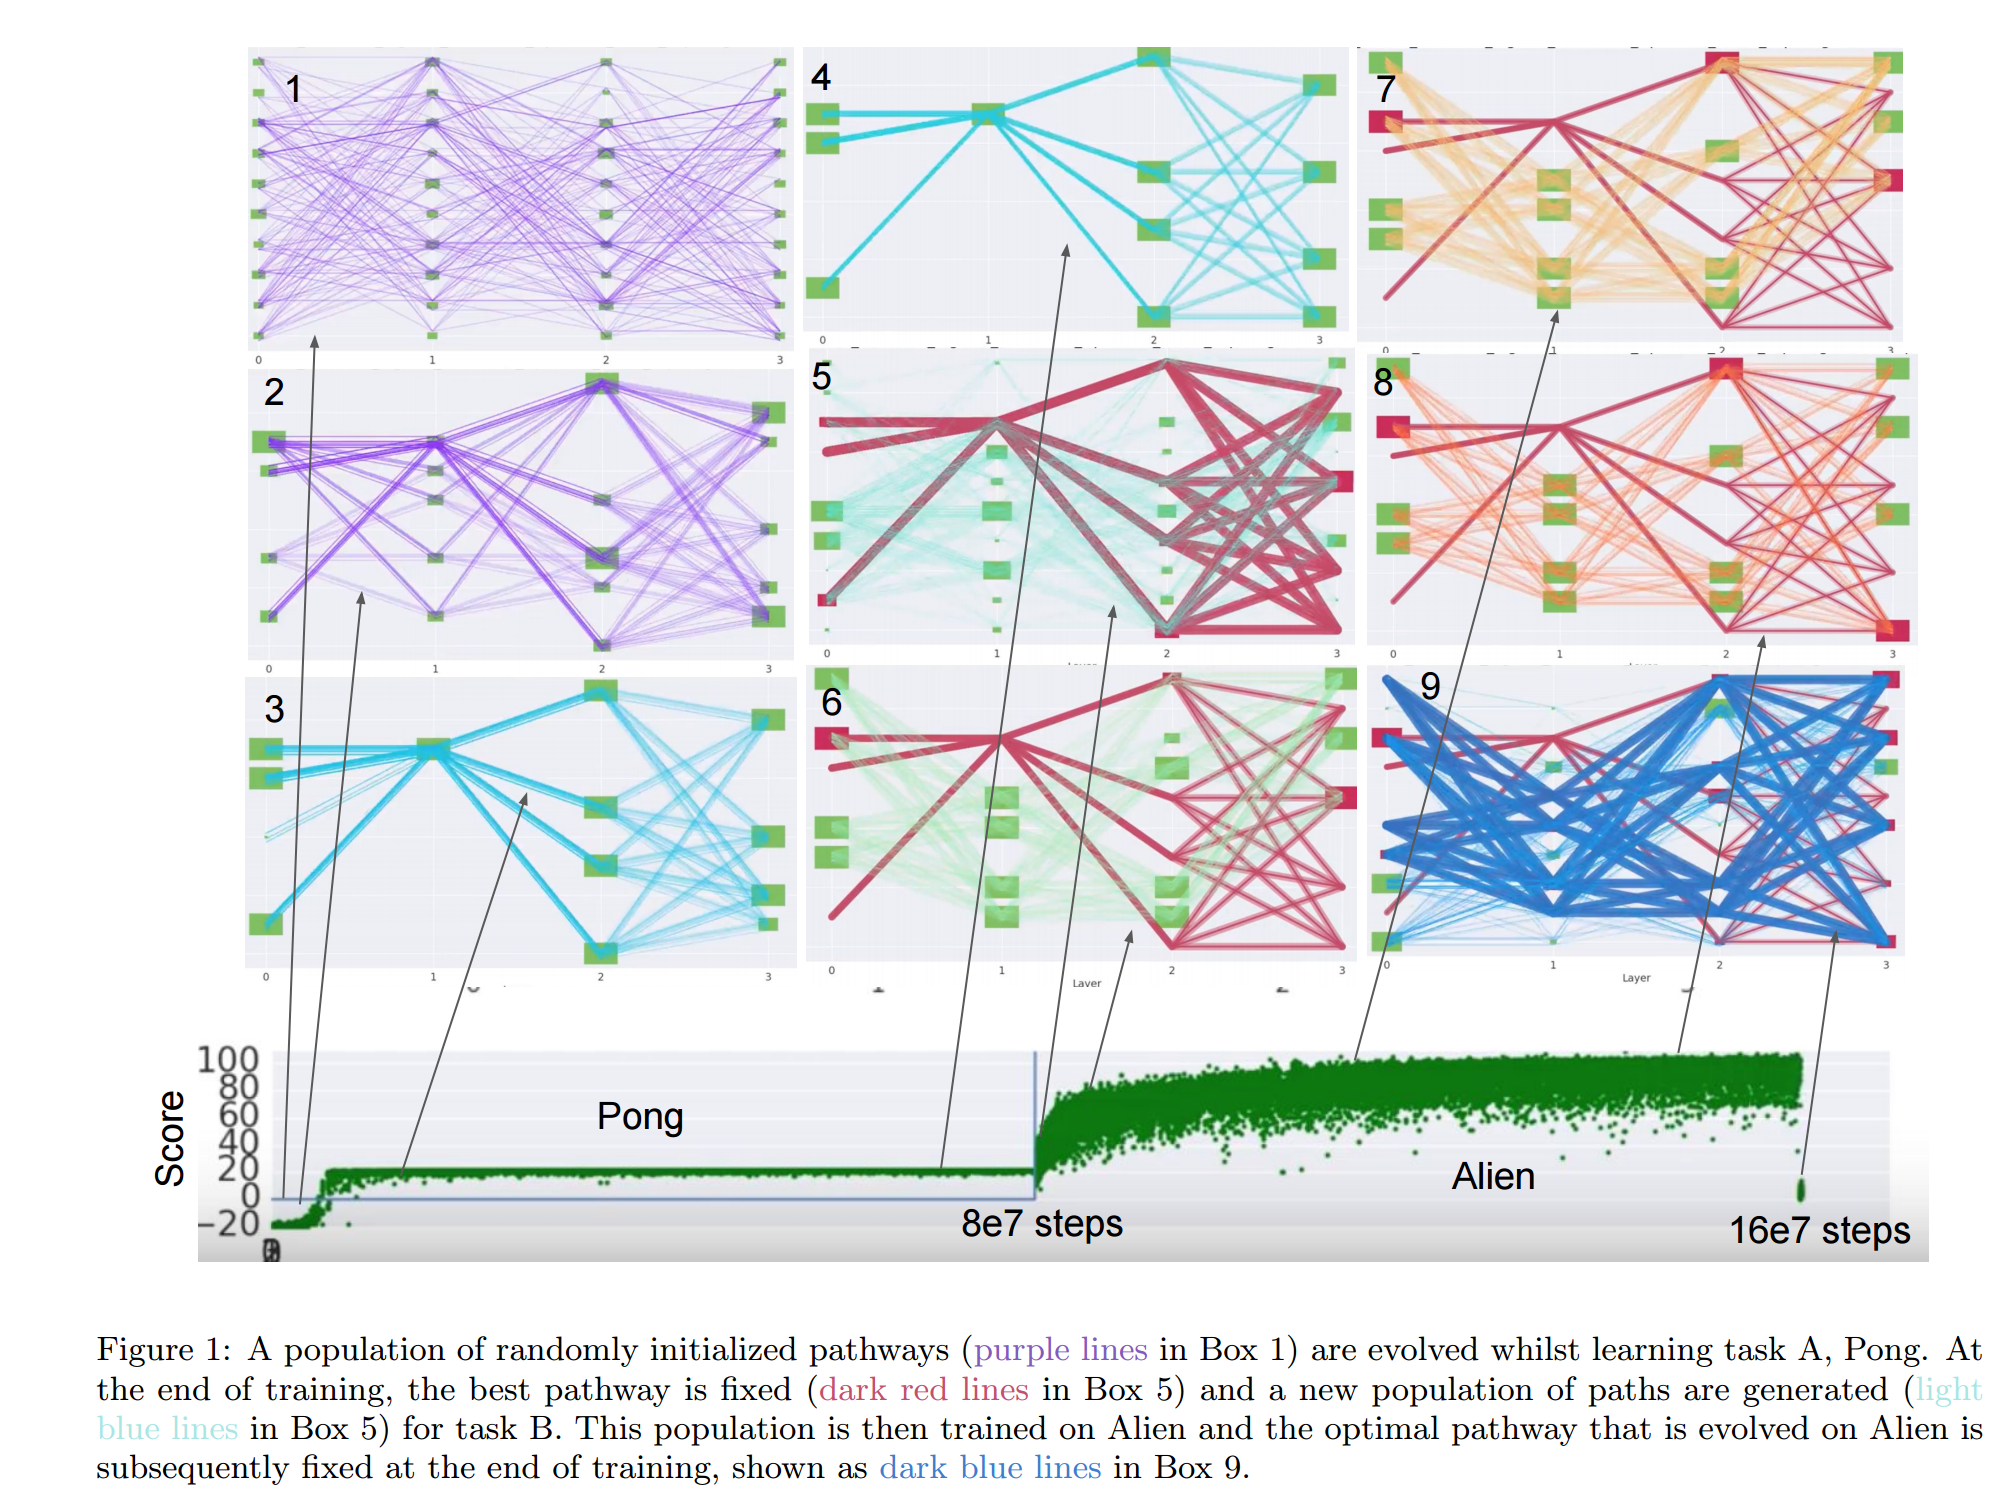

In [3]:
Image(filename='fig1.PNG') 

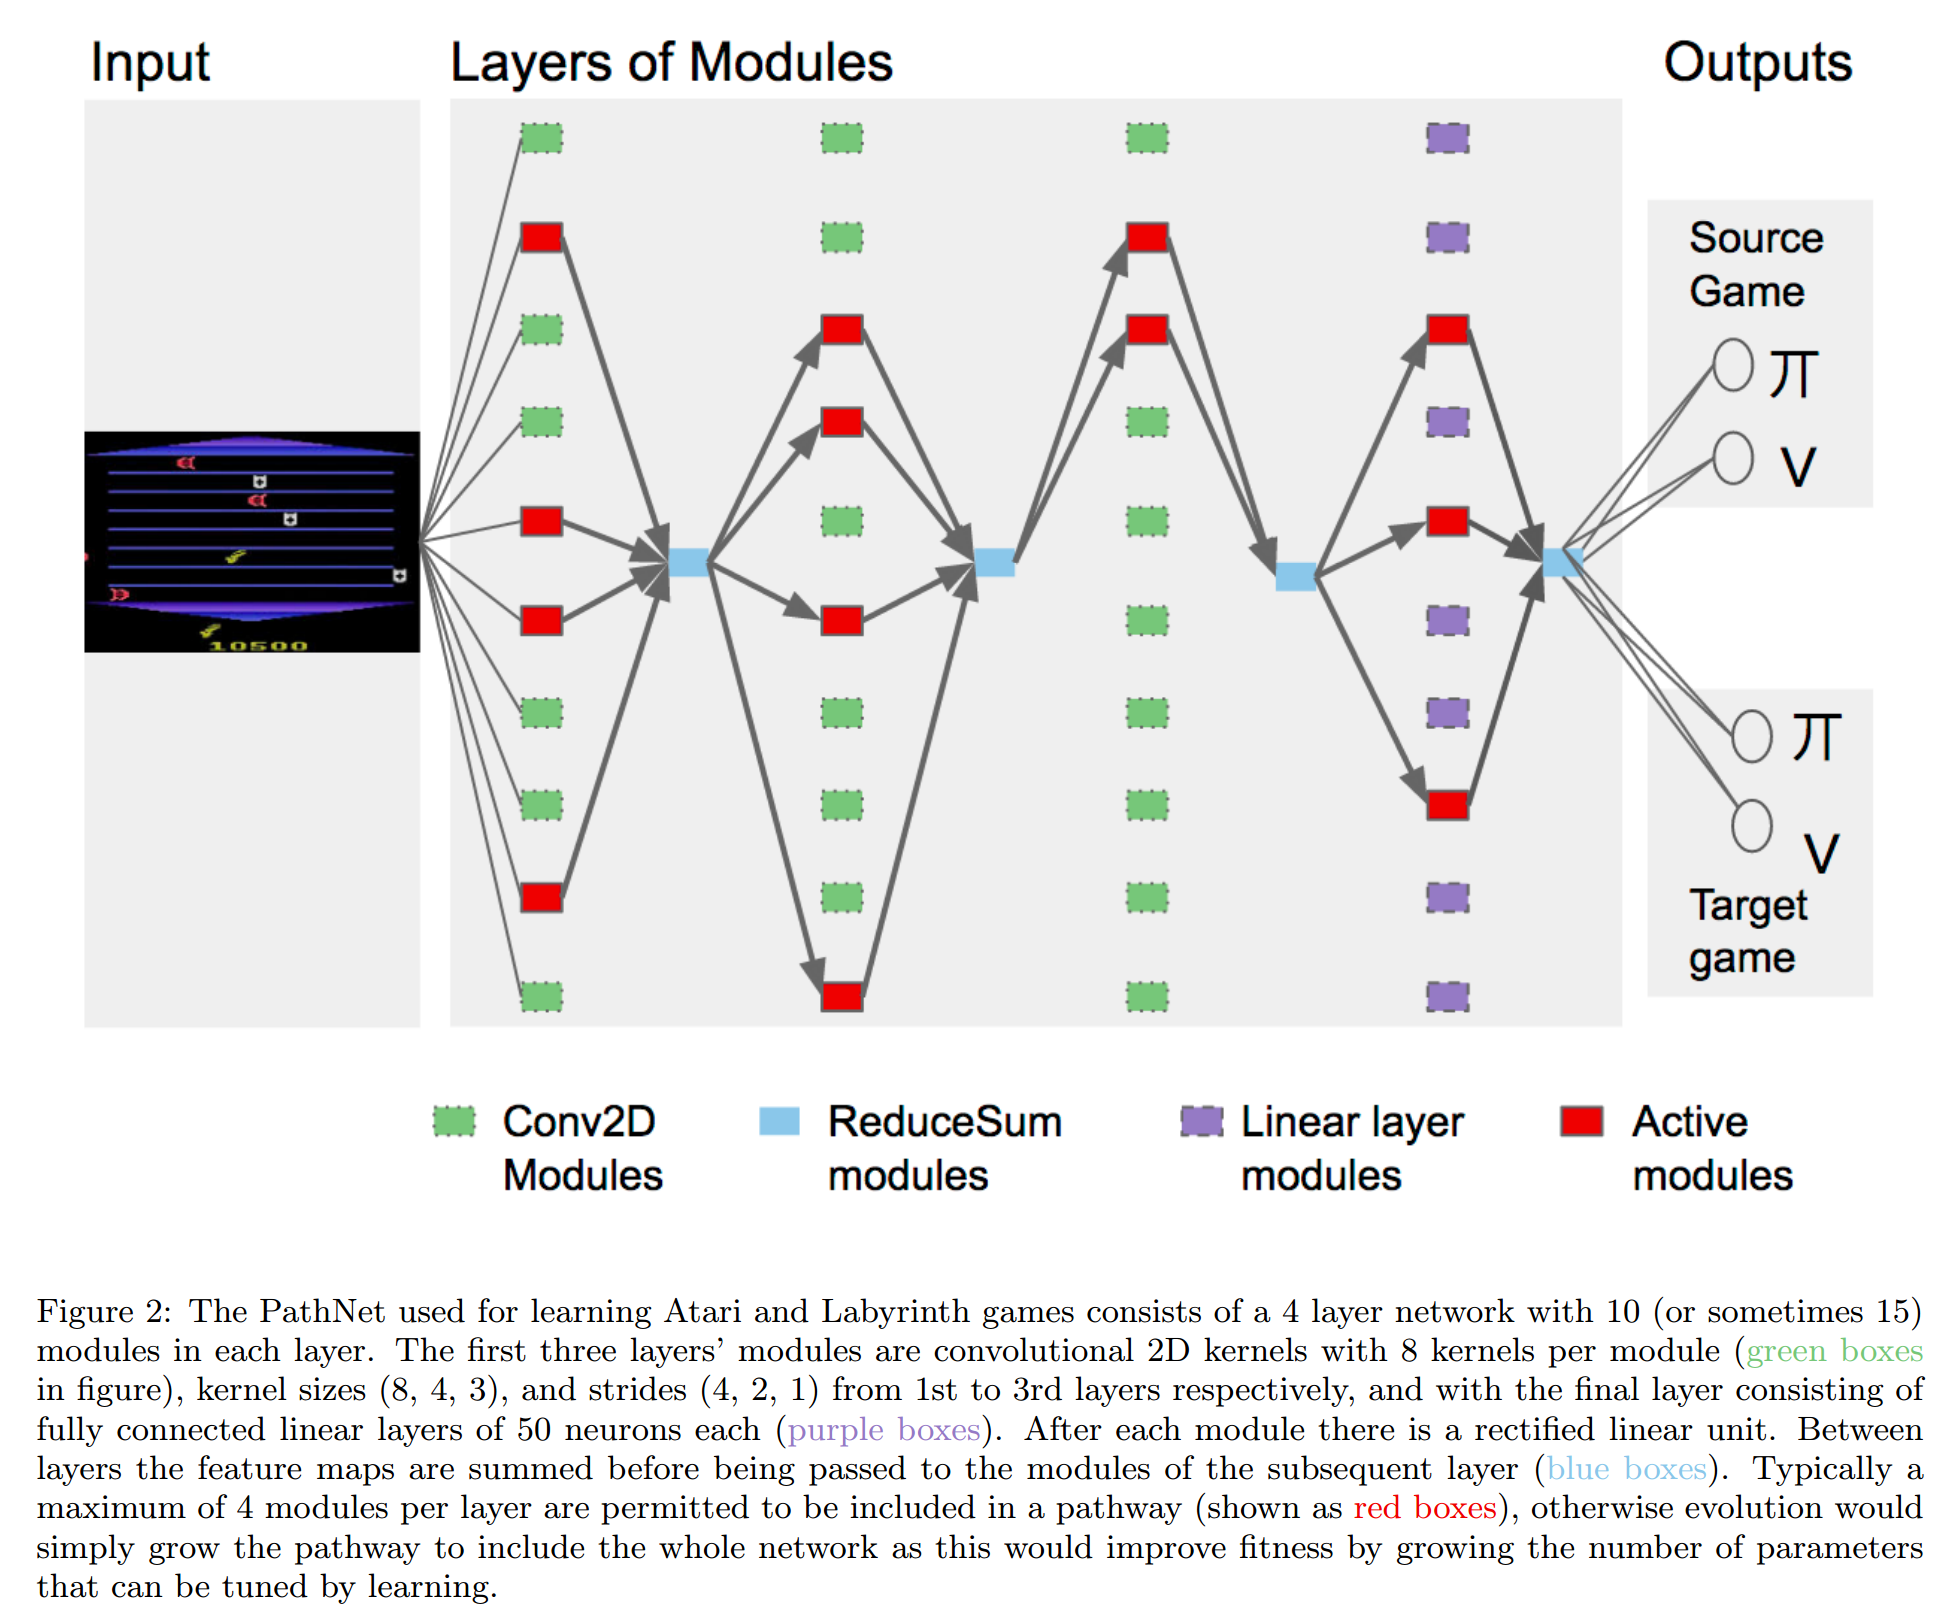

In [4]:
Image(filename='fig2.PNG')

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import time

In [4]:
%matplotlib inline

In [5]:
import motif_processor
reload(motif_processor)

<module 'motif_processor' from 'motif_processor.pyc'>

In [6]:
HepG2MotifProcObj = motif_processor.MotifProcessor(ENCODE_only=False, 
                                                   cell_line="HepG2", 
                                                   meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/HepG2_pos_steme/steme.txt")
HepG2_motif_tensor, HepG2_motif_names = HepG2MotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)

K562MotifProcObj = motif_processor.MotifProcessor(ENCODE_only=False, 
                                                   cell_line="K562", 
                                                   meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/K562_pos_steme/steme.txt")
K562_motif_tensor, K562_motif_names = K562MotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)


LCLMotifProcObj = motif_processor.MotifProcessor(ENCODE_only=False, 
                                                   cell_line="LCL", 
                                                   meme_file="/home/alvin/Dropbox/Lab/CNN/data/meme/LCL_pos_steme/steme.txt")
LCL_motif_tensor, LCL_motif_names = LCLMotifProcObj.generate_custom_CNN_filters(max_length = 18, padding = 0, truncate = False)

In [7]:
import common_utils 
reload(common_utils)

Using gpu device 1: TITAN X (Pascal) (CNMeM is disabled, cuDNN 5105)
/home/alvin/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
/home/alvin/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/home/alvin/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be 

<module 'common_utils' from 'common_utils.pyc'>

In [8]:
start = time.time()
CrossValProcObj = common_utils.CrossValProcessor(output_dirs = ["./HEPG2_act_1_25/", "./HEPG2_rep_1_25/", 
                                                                      "./K562_act_1_25/", "./K562_act_1_25/",
                                                                      "./LCL_act_alt_1_25/"])
print(time.time()-start)

/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/HEPG2_act_mpra_dna.txt
original
/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/K562_act_mpra_dna.txt
original
/home/alvin/Dropbox/Lab/CNN/data/processed_cnn/LCL_act_mpra_dna.txt
original
37.5516970158


In [86]:
import pathnet
reload(pathnet)

<module 'pathnet' from 'pathnet.pyc'>

In [87]:
PathNetObj = pathnet.PathNet(debug=True)

In [160]:
X_LCL=CrossValProcObj.LCL_binObj.merged_tensor
X_RC_LCL=CrossValProcObj.LCL_binObj.merged_RC_tensor
Y_LCL=CrossValProcObj.LCL_binObj.merged_tar
test_dict = {'X': X_LCL, 'X_RC': X_RC_LCL, 'Y': Y_LCL}

In [89]:
X=CrossValProcObj.HepG2_binObj.merged_tensor
X_RC=CrossValProcObj.HepG2_binObj.merged_RC_tensor
Y=CrossValProcObj.HepG2_binObj.merged_tar
r_dict = PathNetObj.challenge(X, X_RC, Y, test_dict=test_dict)

Iteration 0 done in 60.8552
{'challenger_auROC': 0.65189649630343949, 'challenger_test_auROC': 0.64265455651514847, 'best_auroc': 0.65759134254794815, 'best_genotype': array([[10,  7,  0,  8],
       [10,  9,  0,  8]]), 'best_test_auROC': 0.63972467439216552, 'challenger_genotype': array([[ 7,  4, 10,  3],
       [ 9,  1,  5,  0]])}
Iteration 1 done in 122.9554
{'challenger_auROC': 0.68220829315332687, 'challenger_test_auROC': 0.66226137383569017, 'best_auroc': 0.69966248794599806, 'best_genotype': array([[ 6,  7,  0,  8],
       [10,  7,  0,  6]]), 'best_test_auROC': 0.67053144384386765, 'challenger_genotype': array([[11,  9,  0,  7],
       [ 0,  6,  2, 10]])}
Iteration 2 done in 186.4268
{'challenger_auROC': 0.6667791706846673, 'challenger_test_auROC': 0.64714392564373613, 'best_auroc': 0.70384120861459332, 'best_genotype': array([[ 6,  7,  0,  8],
       [10,  7,  0,  6]]), 'best_test_auROC': 0.66288258172607051, 'challenger_genotype': array([[ 8, 10,  9,  0],
       [11,  6,  1,  

In [90]:
b1 = []
b2 = []
c1 = []
c2 = []
bauroc = []
cauroc = []
tbauroc = []
tcauroc = []
for key, val in r_dict.iteritems():
    bauroc.append(val['best_auroc'])
    cauroc.append(val['challenger_auROC'])
    tbauroc.append(val['best_test_auROC'])
    tcauroc.append(val['challenger_test_auROC'])
    b1.append(val['best_genotype'][0])
    b2.append(val['best_genotype'][1])
    c1.append(val['challenger_genotype'][0])
    c2.append(val['challenger_genotype'][1])

In [91]:
def transform(arr):
    r = np.zeros((12,len(arr)))
    for idx, a in enumerate(arr):
        for i in a:
            r[i,idx] = 1
    return r

bt1 = transform(b1)
print(bt1)

[[ 1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.
   1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.
   0.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 0.  0.  0.  0.  0.

(0, 20)

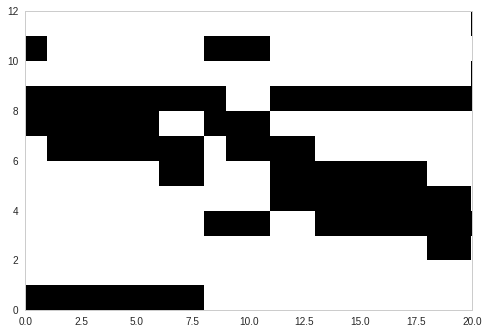

In [92]:
plt.pcolor(bt1)
plt.xlim(0,20)

In [49]:
bt1 = transform(b1)
bt2 = transform(b2)
ct1 = transform(c1)
ct2 = transform(c2)

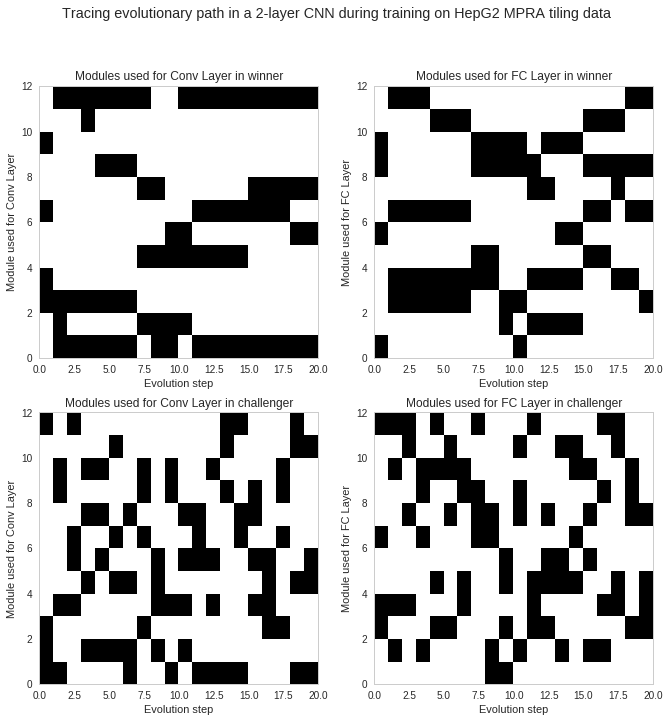

In [144]:
plt.figure(figsize=(16,16))
f, axarr = plt.subplots(2, 2,figsize=(11,11))
f.suptitle('Tracing evolutionary path in a 2-layer CNN during training on HepG2 MPRA tiling data')
axarr[0, 0].pcolor(bt1)
axarr[0, 0].set_xlim(0,20)
axarr[0, 0].set_xlabel('Evolution step')
axarr[0, 0].set_ylabel('Module used for Conv Layer')
axarr[0, 0].set_title('Modules used for Conv Layer in winner')
axarr[0, 1].pcolor(bt2)
axarr[0, 1].set_xlim(0,20)
axarr[0, 1].set_xlabel('Evolution step')
axarr[0, 1].set_ylabel('Module used for FC Layer')
axarr[0, 1].set_title('Modules used for FC Layer in winner')
axarr[1, 0].pcolor(ct1)
axarr[1, 0].set_xlim(0,20)
axarr[1, 0].set_xlabel('Evolution step')
axarr[1, 0].set_ylabel('Module used for Conv Layer')
axarr[1, 0].set_title('Modules used for Conv Layer in challenger')
axarr[1, 1].pcolor(ct2)
axarr[1, 1].set_xlim(0,20)
axarr[1, 1].set_xlabel('Evolution step')
axarr[1, 1].set_ylabel('Module used for FC Layer')
axarr[1, 1].set_title('Modules used for FC Layer in challenger')
plt.savefig('PathNet_HepG2.png', dpi=300)

In [94]:
bauroc

[0.65759134254794815,
 0.69966248794599806,
 0.70384120861459332,
 0.7100450016072003,
 0.71307189542483662,
 0.71698810671809698,
 0.72030429658202078,
 0.70702882245794496,
 0.72152576877745633,
 0.71481838637094186,
 0.71335047680274299,
 0.71106825243758698,
 0.71717561341476488,
 0.71669345333761925,
 0.71013607628843889,
 0.72107039537126327,
 0.70983070823957994,
 0.71612021857923502,
 0.72987249544626587,
 0.72938497803492974,
 0.73564770170363225]

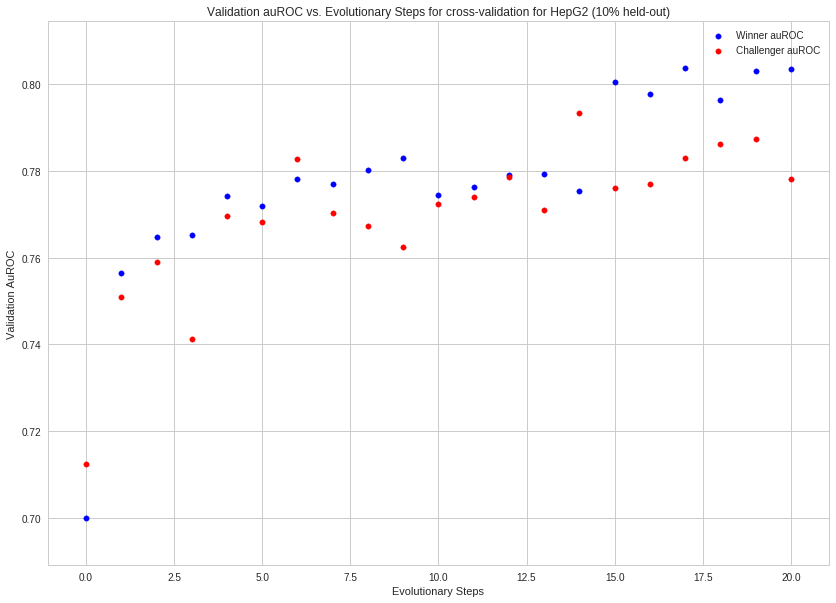

In [147]:
plt.figure(figsize=(14,10))
plt.scatter(np.arange(len(bauroc)), bauroc, c='b', s=30, label="Winner auROC")
plt.scatter(np.arange(len(cauroc)), cauroc, c='r', s=30, label="Challenger auROC")
plt.xlabel('Evolutionary Steps')
plt.ylabel('Validation AuROC')
plt.title('Validation auROC vs. Evolutionary Steps for cross-validation for HepG2 (10% held-out)')
plt.legend()
plt.savefig('HepG2_val_auROC_pre_transfer.png', dpi=300)

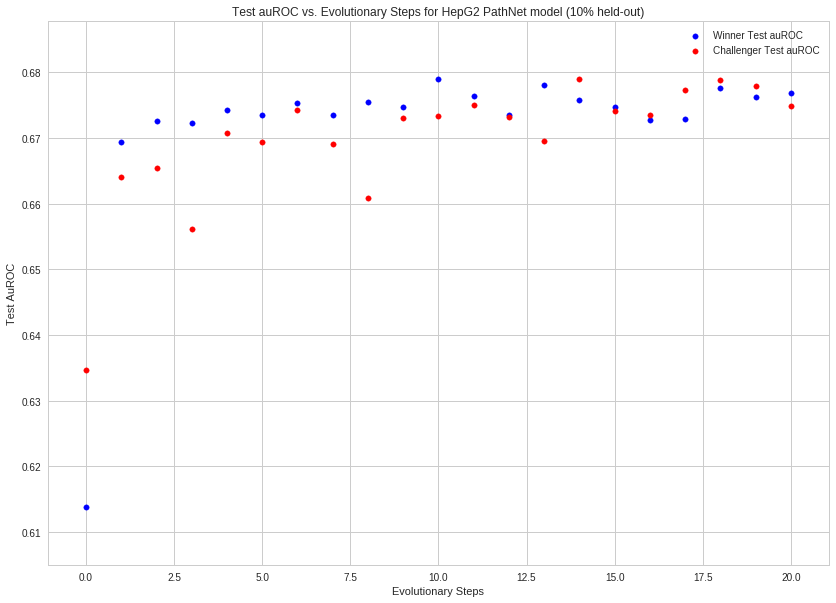

In [149]:
plt.figure(figsize=(14,10))
plt.scatter(np.arange(len(bauroc)), tbauroc, c='b', s=30, label="Winner Test auROC")
plt.scatter(np.arange(len(cauroc)), tcauroc, c='r', s=30, label="Challenger Test auROC")
plt.xlabel('Evolutionary Steps')
plt.ylabel('Test AuROC')
plt.title('Test auROC vs. Evolutionary Steps for HepG2 PathNet model (10% held-out)')
plt.legend()
plt.savefig('HepG2_test_auROC_pre_transfer.png', dpi=300, bbox_inches='tight')

In [54]:
PathNetObj.best_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Seq_Input (InputLayer)           (None, 1, 4, 150)     0                                            
____________________________________________________________________________________________________
RC_Input (InputLayer)            (None, 1, 4, 150)     0                                            
____________________________________________________________________________________________________
convolution2d_19 (Convolution2D) (None, 40, 1, 133)    2920        Seq_Input[0][0]                  
                                                                   RC_Input[0][0]                   
____________________________________________________________________________________________________
convolution2d_12 (Convolution2D) (None, 40, 1, 133)    2920        Seq_Input[0][0]         

In [25]:
from sklearn.metrics import auc, log_loss, precision_recall_curve, roc_auc_score, roc_curve

### Best Pathnet model predicts LCL

In [97]:
Y_LCL_Pred = PathNetObj.best_model.predict([X_LCL, X_RC_LCL])
roc_auc_score(Y_LCL.astype(bool),Y_LCL_Pred )

0.66540171928914771

In [38]:
PathNetObj.weights[0]

1.1600466052324965

In [161]:
simpleCNNObj = pathnet.SimpleCNNModel(X, X_RC)
simpleCNNObj.build_model(pool_width=4)
simpleCNNObj.train(X,X_RC, Y, PathNetObj.weights[0], PathNetObj.weights[1])
scY = simpleCNNObj.model.predict([X_LCL, X_RC_LCL])
roc_auc_score(Y_LCL.astype(bool),scY)
yVal = simpleCNNObj.model.predict([X,X_RC])
roc_auc_score(Y.astype(bool),yVal)

0.72637109518746346

In [99]:
PathNetObj.switch_tasks(1)

In [162]:
X=CrossValProcObj.K562_binObj.merged_tensor
X_RC=CrossValProcObj.K562_binObj.merged_RC_tensor
Y=CrossValProcObj.K562_binObj.merged_tar

In [101]:
trainable_modules = [[],[]]
for mod in PathNetObj.Layers[0].modules:
    trainable_modules[0].append(mod.trainable)
for mod in PathNetObj.Layers[1].modules:
        trainable_modules[1].append(mod.trainable)

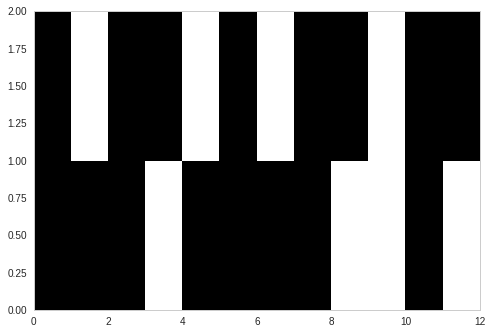

In [102]:
plt.pcolor(trainable_modules)

In [103]:
r_hepg2_dict = PathNetObj.challenge(X, X_RC, Y, test_dict = test_dict)

Iteration 0 done in 52.5591
{'challenger_auROC': 0.71060432205010515, 'challenger_test_auROC': 0.61867581825797324, 'best_auroc': 0.26867257389345744, 'best_genotype': array([[ 8,  9,  3, 11],
       [ 6,  1,  9,  4]]), 'best_test_auROC': 0.3830243333266849, 'challenger_genotype': array([[ 5, 10,  7,  4],
       [ 9,  6,  7, 11]])}
Iteration 1 done in 111.2879
{'challenger_auROC': 0.73883895369839148, 'challenger_test_auROC': 0.66295325807288019, 'best_auroc': 0.76872569643653976, 'best_genotype': array([[ 5, 10,  7,  4],
       [ 9,  5,  7, 11]]), 'best_test_auROC': 0.67142074715280131, 'challenger_genotype': array([[4, 6, 1, 3],
       [6, 3, 4, 7]])}
Iteration 2 done in 166.2084
{'challenger_auROC': 0.69507925883427879, 'challenger_test_auROC': 0.63839036041246988, 'best_auroc': 0.77319861456407635, 'best_genotype': array([[ 5,  9,  7,  4],
       [10,  5,  7, 11]]), 'best_test_auROC': 0.67429806330653996, 'challenger_genotype': array([[ 8,  9, 11, 10],
       [ 4,  0,  3, 10]])}
It

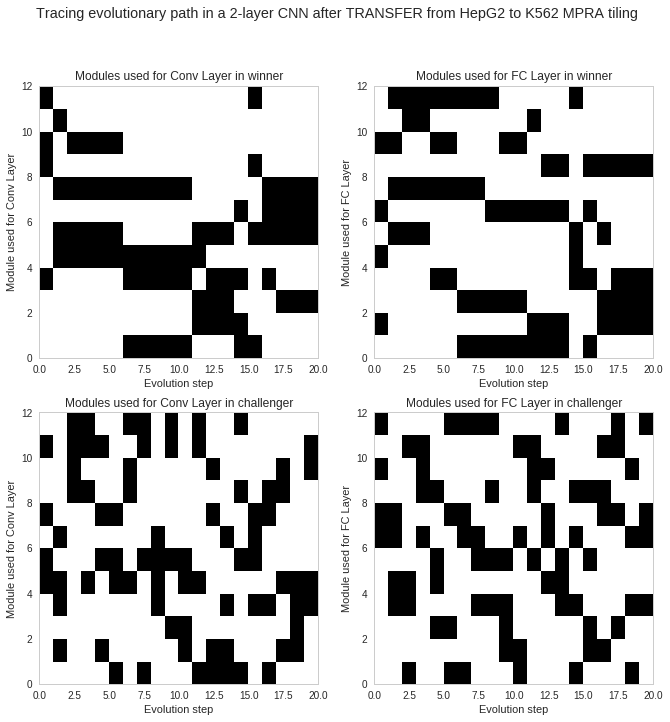

In [156]:
b1 = []
b2 = []
c1 = []
c2 = []
bauroc = []
cauroc = []
tbauroc = []
tcauroc = []
for key, val in r_hepg2_dict.iteritems():
    bauroc.append(val['best_auroc'])
    cauroc.append(val['challenger_auROC'])
    tbauroc.append(val['best_test_auROC'])
    tcauroc.append(val['challenger_test_auROC'])
    b1.append(val['best_genotype'][0])
    b2.append(val['best_genotype'][1])
    c1.append(val['challenger_genotype'][0])
    c2.append(val['challenger_genotype'][1])
bt1 = transform(b1)
bt2 = transform(b2)
ct1 = transform(c1)
ct2 = transform(c2)
f, axarr = plt.subplots(2, 2,figsize=(11,11))
f.suptitle('Tracing evolutionary path in a 2-layer CNN after TRANSFER from HepG2 to K562 MPRA tiling')
axarr[0, 0].pcolor(bt1)
axarr[0, 0].set_xlim(0,20)
axarr[0, 0].set_xlabel('Evolution step')
axarr[0, 0].set_ylabel('Module used for Conv Layer')
axarr[0, 0].set_title('Modules used for Conv Layer in winner')
axarr[0, 1].pcolor(bt2)
axarr[0, 1].set_xlim(0,20)
axarr[0, 1].set_xlabel('Evolution step')
axarr[0, 1].set_ylabel('Module used for FC Layer')
axarr[0, 1].set_title('Modules used for FC Layer in winner')
axarr[1, 0].pcolor(ct1)
axarr[1, 0].set_xlim(0,20)
axarr[1, 0].set_xlabel('Evolution step')
axarr[1, 0].set_ylabel('Module used for Conv Layer')
axarr[1, 0].set_title('Modules used for Conv Layer in challenger')
axarr[1, 1].pcolor(ct2)
axarr[1, 1].set_xlim(0,20)
axarr[1, 1].set_xlabel('Evolution step')
axarr[1, 1].set_ylabel('Module used for FC Layer')
axarr[1, 1].set_title('Modules used for FC Layer in challenger')
plt.savefig('HepG2_paths_post_transfer.png', dpi=300, bbox_inches='tight')

In [151]:
bauroc

[0.6998416948216144,
 0.75651813603620821,
 0.76483181402860123,
 0.76513992477847903,
 0.77410701005078519,
 0.77179086717239331,
 0.77809651303627203,
 0.77693844159707603,
 0.78016297996217676,
 0.78297316249123483,
 0.77434606149465601,
 0.77617878923099803,
 0.77912709037207029,
 0.779344892798708,
 0.77540320010199526,
 0.8004239178937973,
 0.79774122946813708,
 0.80379188712522054,
 0.79633348207645405,
 0.80314379209961539,
 0.80355814793565805]

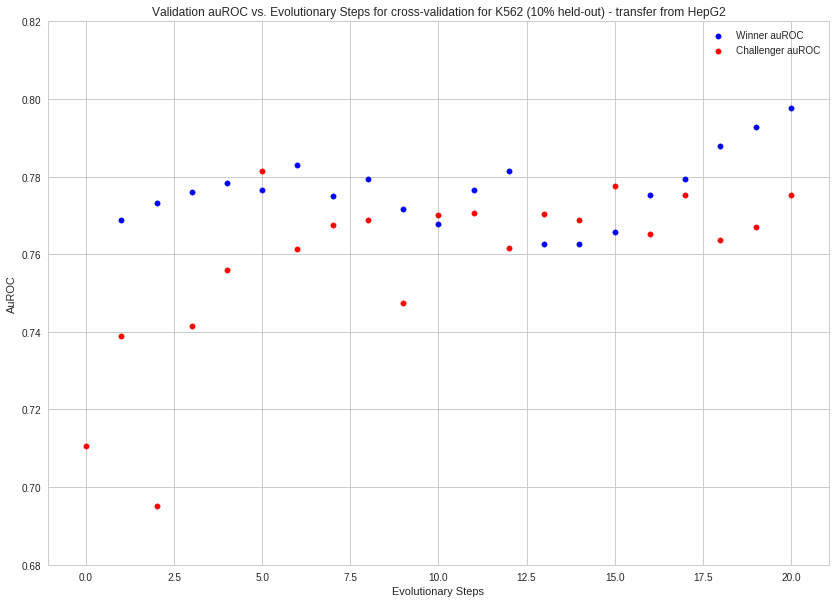

In [158]:
plt.figure(figsize=(14,10))
plt.scatter(np.arange(len(bauroc)), bauroc, c='b', s=30, label="Winner auROC")
plt.scatter(np.arange(len(cauroc)), cauroc, c='r', s=30, label="Challenger auROC")
plt.xlabel('Evolutionary Steps')
plt.ylabel('AuROC')
plt.ylim([0.68, 0.82])
plt.title('Validation auROC vs. Evolutionary Steps for cross-validation for K562 (10% held-out) - transfer from HepG2')
plt.legend()
plt.savefig('K562_val_auROC_post_transfer.png', dpi=300, bbox_inches='tight')

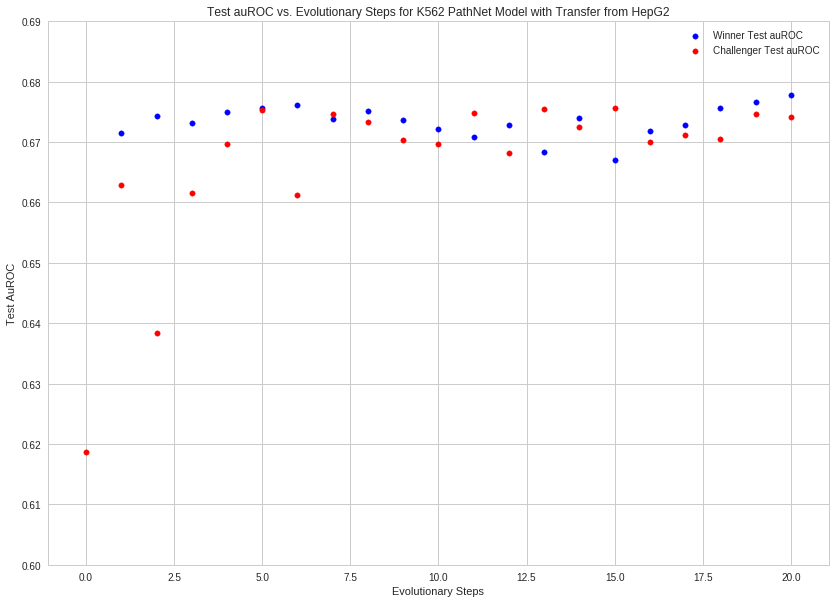

In [159]:
plt.figure(figsize=(14,10))
plt.scatter(np.arange(len(bauroc)), tbauroc, c='b', s=30, label="Winner Test auROC")
plt.scatter(np.arange(len(cauroc)), tcauroc, c='r', s=30, label="Challenger Test auROC")
plt.xlabel('Evolutionary Steps')
plt.ylim([0.6, 0.69])
plt.ylabel('Test AuROC')
plt.title('Test auROC vs. Evolutionary Steps for K562 PathNet Model with Transfer from HepG2')
plt.legend()
plt.savefig('K562_test_auROC_post_transfer.png', dpi=300, bbox_inches='tight')

In [150]:
def val_auroc(simplecnn, pathnet):
    X_test = pathnet.X_test
    X_test_RC = pathnet.X_RC_test
    Y_test = pathnet.Y_test.astype(bool)
    Y_pred_test = simplecnn.model.predict([X_test, X_test_RC])
    return roc_auc_score(Y_test,Y_pred_test)
    

In [114]:
Y_LCL_Pred = PathNetObj.best_model.predict([X_LCL, X_RC_LCL])
roc_auc_score(Y_LCL.astype(bool),Y_LCL_Pred )

0.67785631370046073

In [ ]:
simpleCNNObj = pathnet.SimpleCNNModel(X, X_RC)
simpleCNNObj.build_model(pool_width=4)
simpleCNNObj.train(X,X_RC, Y, PathNetObj.weights[0], PathNetObj.weights[1])
scY = simpleCNNObj.model.predict([X_LCL, X_RC_LCL])
print(roc_auc_score(Y_LCL.astype(bool),scY))
yVal = simpleCNNObj.model.predict([X,X_RC])
print(roc_auc_score(Y.astype(bool),yVal))

In [153]:
yVal = simpleCNNObj.model.predict([X,X_RC])
roc_auc_score(Y.astype(bool),yVal)

0.736353212712344

In [117]:
PathNetObjK562 = pathnet.PathNet(debug=True)
r_K562_dict = PathNetObjK562.challenge(X, X_RC, Y, test_dict = test_dict)

Iteration 0 done in 66.6585
{'challenger_auROC': 0.71227768215720022, 'challenger_test_auROC': 0.63469689051997524, 'best_auroc': 0.6998416948216144, 'best_genotype': array([[9, 3, 6, 2],
       [8, 0, 5, 9]]), 'best_test_auROC': 0.61383225960867227, 'challenger_genotype': array([[ 0,  1, 11,  2],
       [11,  2,  6,  3]])}
Iteration 1 done in 128.7540
{'challenger_auROC': 0.75081808716346865, 'challenger_test_auROC': 0.66411902387458366, 'best_auroc': 0.75651813603620821, 'best_genotype': array([[ 0,  1, 11,  2],
       [11,  2,  6,  3]]), 'best_test_auROC': 0.66947704290244736, 'challenger_genotype': array([[ 9,  8,  3,  0],
       [ 3, 11,  1,  9]])}
Iteration 2 done in 189.1416
{'challenger_auROC': 0.75906270584985436, 'challenger_test_auROC': 0.66541130302969864, 'best_auroc': 0.76483181402860123, 'best_genotype': array([[ 0, -1, 11,  2],
       [11,  2,  6,  3]]), 'best_test_auROC': 0.67260265871512048, 'challenger_genotype': array([[11,  6,  3,  5],
       [ 3, 10, 11,  7]])}
It

In [118]:
Y_LCL_Pred_K562 = PathNetObjK562.best_model.predict([X_LCL, X_RC_LCL])
roc_auc_score(Y_LCL.astype(bool),Y_LCL_Pred_K562)

0.67690884975168031

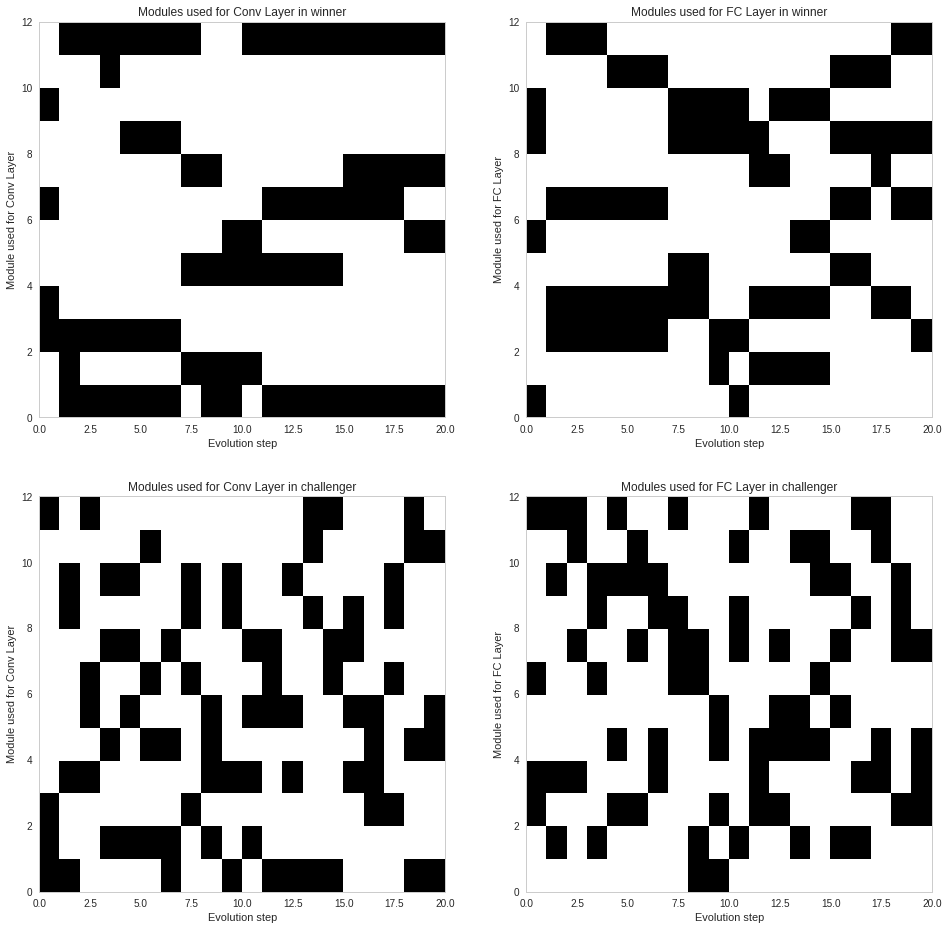

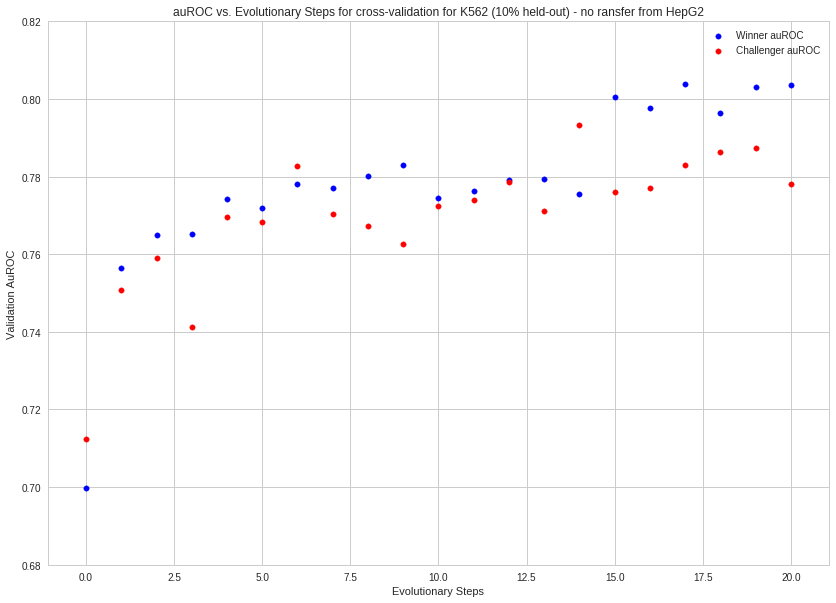

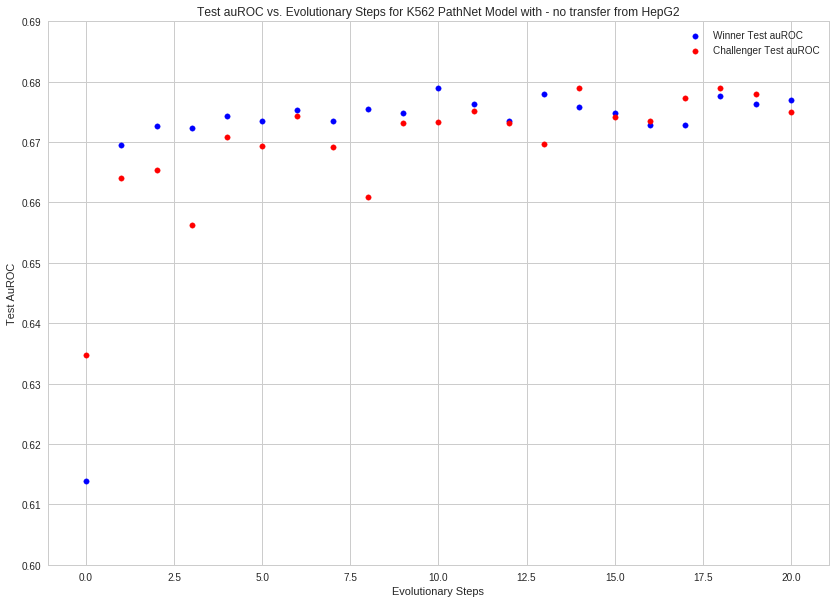

In [136]:
b1 = []
b2 = []
c1 = []
c2 = []
bauroc = []
cauroc = []
tbauroc = []
tcauroc = []
for key, val in r_K562_dict.iteritems():
    bauroc.append(val['best_auroc'])
    cauroc.append(val['challenger_auROC'])
    tbauroc.append(val['best_test_auROC'])
    tcauroc.append(val['challenger_test_auROC'])
    b1.append(val['best_genotype'][0])
    b2.append(val['best_genotype'][1])
    c1.append(val['challenger_genotype'][0])
    c2.append(val['challenger_genotype'][1])
bt1 = transform(b1)
bt2 = transform(b2)
ct1 = transform(c1)
ct2 = transform(c2)
plt.figure(figsize=(16,12))
f, axarr = plt.subplots(2, 2,figsize=(16,16))
axarr[0, 0].pcolor(bt1)
axarr[0, 0].set_xlim(0,20)
axarr[0, 0].set_xlabel('Evolution step')
axarr[0, 0].set_ylabel('Module used for Conv Layer')
axarr[0, 0].set_title('Modules used for Conv Layer in winner')
axarr[0, 1].pcolor(bt2)
axarr[0, 1].set_xlim(0,20)
axarr[0, 1].set_xlabel('Evolution step')
axarr[0, 1].set_ylabel('Module used for FC Layer')
axarr[0, 1].set_title('Modules used for FC Layer in winner')
axarr[1, 0].pcolor(ct1)
axarr[1, 0].set_xlim(0,20)
axarr[1, 0].set_xlabel('Evolution step')
axarr[1, 0].set_ylabel('Module used for Conv Layer')
axarr[1, 0].set_title('Modules used for Conv Layer in challenger')
axarr[1, 1].pcolor(ct2)
axarr[1, 1].set_xlim(0,20)
axarr[1, 1].set_xlabel('Evolution step')
axarr[1, 1].set_ylabel('Module used for FC Layer')
axarr[1, 1].set_title('Modules used for FC Layer in challenger')

plt.figure(figsize=(14,10))
plt.scatter(np.arange(len(bauroc)), bauroc, c='b', s=30, label="Winner auROC")
plt.scatter(np.arange(len(cauroc)), cauroc, c='r', s=30, label="Challenger auROC")
plt.ylim([0.68, 0.82])
plt.xlabel('Evolutionary Steps')
plt.ylabel('Validation AuROC')
plt.title('auROC vs. Evolutionary Steps for cross-validation for K562 (10% held-out) - no ransfer from HepG2')
plt.legend()
 
plt.figure(figsize=(14,10))
plt.scatter(np.arange(len(bauroc)), tbauroc, c='b', s=30, label="Winner Test auROC")
plt.scatter(np.arange(len(cauroc)), tcauroc, c='r', s=30, label="Challenger Test auROC")
plt.ylim([0.6, 0.69])
plt.xlabel('Evolutionary Steps')
plt.ylabel('Test AuROC')
plt.title('Test auROC vs. Evolutionary Steps for K562 PathNet Model with - no transfer from HepG2')
plt.legend()

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,X_RC_train, X_RC_test, y_train, y_test = train_test_split(X,X_RC,Y, test_size=0.10, random_state=42)


In [71]:
simpleCNNobj = comVar_keras.SimpleKerasModel()

TypeError: __init__() takes at least 2 arguments (1 given)

In [163]:
from keras.utils.visualize_util import plot
plot(PathNetObj.best_model, to_file='pathnet_model1.png')

In [164]:
plot(PathNetObj.challenger_model, to_file='pathnet_model2.png')

In [172]:
a = []
for key, val in r_dict.iteritems():
    a.append(val['best_genotype'][1])

In [173]:
a

[array([4, 1, 8, 5]),
 array([4, 1, 8, 5]),
 array([4, 0, 8, 5]),
 array([4, 0, 8, 5])]

In [9]:
from sklearn.cross_decomposition import PLSRegression

In [10]:
X = [[0., 0., 1.], [1.,0.,0.], [2.,2.,2.], [2.,5.,4.]]
Y = [[0.1], [0.9], [6.2], [11.9]]

In [11]:
pls2 = PLSRegression(n_components=2)

In [12]:
pls2.fit(X, Y)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [13]:
Y_pred = pls2.predict(X)

In [14]:
Y_pred

array([[ 1.49771281],
       [ 2.42142693],
       [ 6.27945654],
       [ 8.90140371]])